### Step 1:
Load the dataset

In [1]:
import pandas as pd
Market_df = pd.read_csv(r'D:\Data Analytics Notes\IMS Material\Python Files\Kmeans\Market_cluster.csv')

In [2]:
Market_df.columns

Index(['Visit_ID', 'Avg_Session_Duration', 'Pages_Per_Session', 'Channel',
       'Age', 'Gender', 'Transaction'],
      dtype='object')

In [3]:
Market_df.head()

,Visit_ID,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction
0,100001,17,6,1,26,0,14833
1,100002,7,4,1,30,1,13189
2,100003,17,4,1,33,1,15459
3,100004,9,3,1,27,0,9857
4,100005,17,4,1,34,1,7985


In [4]:
Market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Visit_ID              1000 non-null   int64
 1   Avg_Session_Duration  1000 non-null   int64
 2   Pages_Per_Session     1000 non-null   int64
 3   Channel               1000 non-null   int64
 4   Age                   1000 non-null   int64
 5   Gender                1000 non-null   int64
 6   Transaction           1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


####  Removing Unnecessary variable

In [5]:
# forget about the users for the moment - we'll use this later
del Market_df['Visit_ID']

In [6]:
Market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Avg_Session_Duration  1000 non-null   int64
 1   Pages_Per_Session     1000 non-null   int64
 2   Channel               1000 non-null   int64
 3   Age                   1000 non-null   int64
 4   Gender                1000 non-null   int64
 5   Transaction           1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


In [7]:
Market_df.head()

,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction
0,17,6,1,26,0,14833
1,7,4,1,30,1,13189
2,17,4,1,33,1,15459
3,9,3,1,27,0,9857
4,17,4,1,34,1,7985


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
scaler.fit(Market_df)         # Mean = 0 & standard Deviation =1

Market_df = pd.DataFrame(scaler.transform(Market_df))

Market_df.mean()

Market_df.std()

### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [8]:
samples = Market_df.values # get all row and columne with header 

samples

array([[   17,     6,     1,    26,     0, 14833],
       [    7,     4,     1,    30,     1, 13189],
       [   17,     4,     1,    33,     1, 15459],
       ...,
       [    1,     3,     1,    42,     0,  2131],
       [    2,     3,     0,    48,     0,  4904],
       [    2,     3,     1,    49,     0,  4141]], dtype=int64)

### Step 3:
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

In [22]:
from sklearn.cluster import KMeans

ks = range(1,6)   #ks=1,2,3,4,5
SSE = [] # within-cluster sum-of-squares

for k in ks:  # k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_) #inertia will give variance
    # Inertia: Sum of distances of samplesto their closest cluster center

D:\Data Science\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [23]:
SSE

[19391878806.557034,
 3814990271.260157,
 1759799605.0492563,
 1112554917.7621217,
 658888919.9913284]

#### Elbow Method 

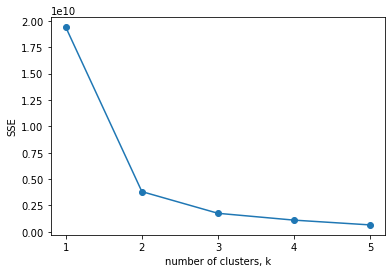

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE,'-o') # -o is point in graph to identify the cluster
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [27]:
model2 = KMeans(n_clusters=3,max_iter=100) # Taking 3 clusters for the Analysis.

In [28]:
labels = model2.fit_predict(samples)

Market_df['Cluster_Made'] = labels
Market_df.head()

,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction,Cluster_Made
0,17,6,1,26,0,14833,1
1,7,4,1,30,1,13189,1
2,17,4,1,33,1,15459,1
3,9,3,1,27,0,9857,2
4,17,4,1,34,1,7985,2


In [29]:
model2.get_params

<bound method BaseEstimator.get_params of KMeans(max_iter=100, n_clusters=3)>

### Final Cluster Centorids 

In [33]:
model2.cluster_centers_

array([[4.46421663e+00, 2.97485493e+00, 5.68665377e-01, 3.45261122e+01,
        5.18375242e-01, 4.14994584e+03],
       [1.26880000e+01, 4.47600000e+00, 7.92000000e-01, 3.28920000e+01,
        5.40000000e-01, 1.41995160e+04],
       [1.25751073e+01, 4.38197425e+00, 8.62660944e-01, 3.29098712e+01,
        5.32188841e-01, 9.27793562e+03]])

In [31]:
Market_df.head()

,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction,Cluster_Made
0,17,6,1,26,0,14833,1
1,7,4,1,30,1,13189,1
2,17,4,1,33,1,15459,1
3,9,3,1,27,0,9857,2
4,17,4,1,34,1,7985,2


In [32]:
Market_df.Cluster_Made.value_counts()

0    517
1    250
2    233
Name: Cluster_Made, dtype: int64

In [ ]:
import os
os.chdir(r"C:\Users\parkm\OneDrive\Desktop\Python code\Feedback of Hotels _ Restuarant")

In [ ]:
Market_df.to_excel("output.xlsx",index=False,sheet_name="irfan") 
# index False will remove by default index,

#Sheet_name=name of sheettrip_advi_df.to_excel("output.xlsx",index=False,sheet_name="irfan") # index False will remove by default index,Sheet_name=name of sheettrip_advi_df.to_excel("output.xlsx",index=False,sheet_name="irfan") # index False will remove by default index,Sheet_name=name of sheet